In [13]:
from view_recording_utils import load_the_recording, memory, calculate_reward_tables, calculate_rewards_per_agent

nplayers, recording = load_the_recording()

Loaded recording: 868248 games


In [14]:
reward = {
    (0, 0): 0,
    (0, 1): 1,
    (1, 0): 2,
    (1, 1): 0
}



In [15]:
stuff_to_plot = None
for re in calculate_reward_tables(reward, nplayers, recording):
    if stuff_to_plot is None:
        stuff_to_plot = {it: [] for it in re}
    for what in re:
        stuff_to_plot[what].append(re[what])


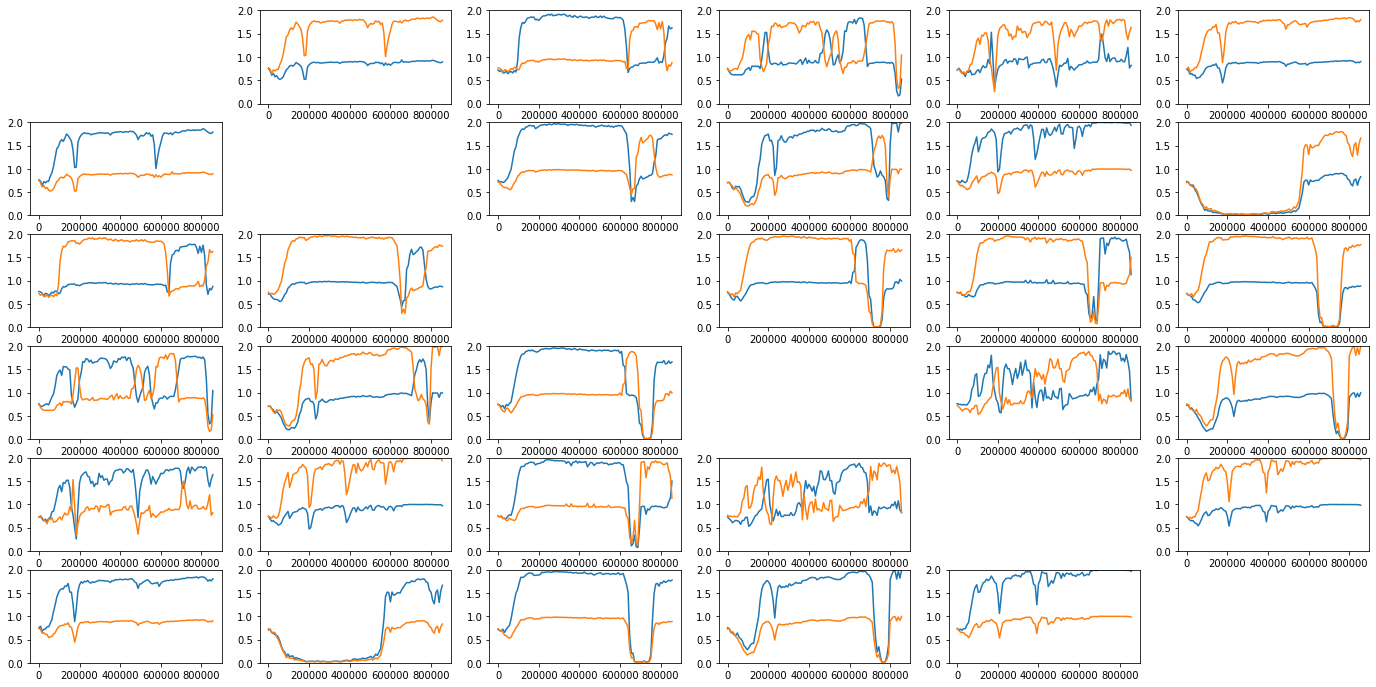

In [16]:
from matplotlib import pyplot as p

figure, boxes = p.subplots(6, 6, figsize=(24, 12))

def plotscale(box, data):
    box.plot([j * 8000 for j in range(len(data))], data)
    
for i in range(nplayers):
    for j in range(nplayers):
        if i == j:
            boxes[i, j].axis('off')
            continue
        boxes[i, j].set_ylim([0, 2])
        
        plotscale(boxes[i, j], stuff_to_plot[i, j])
        plotscale(boxes[i, j], stuff_to_plot[j, i])

p.show()



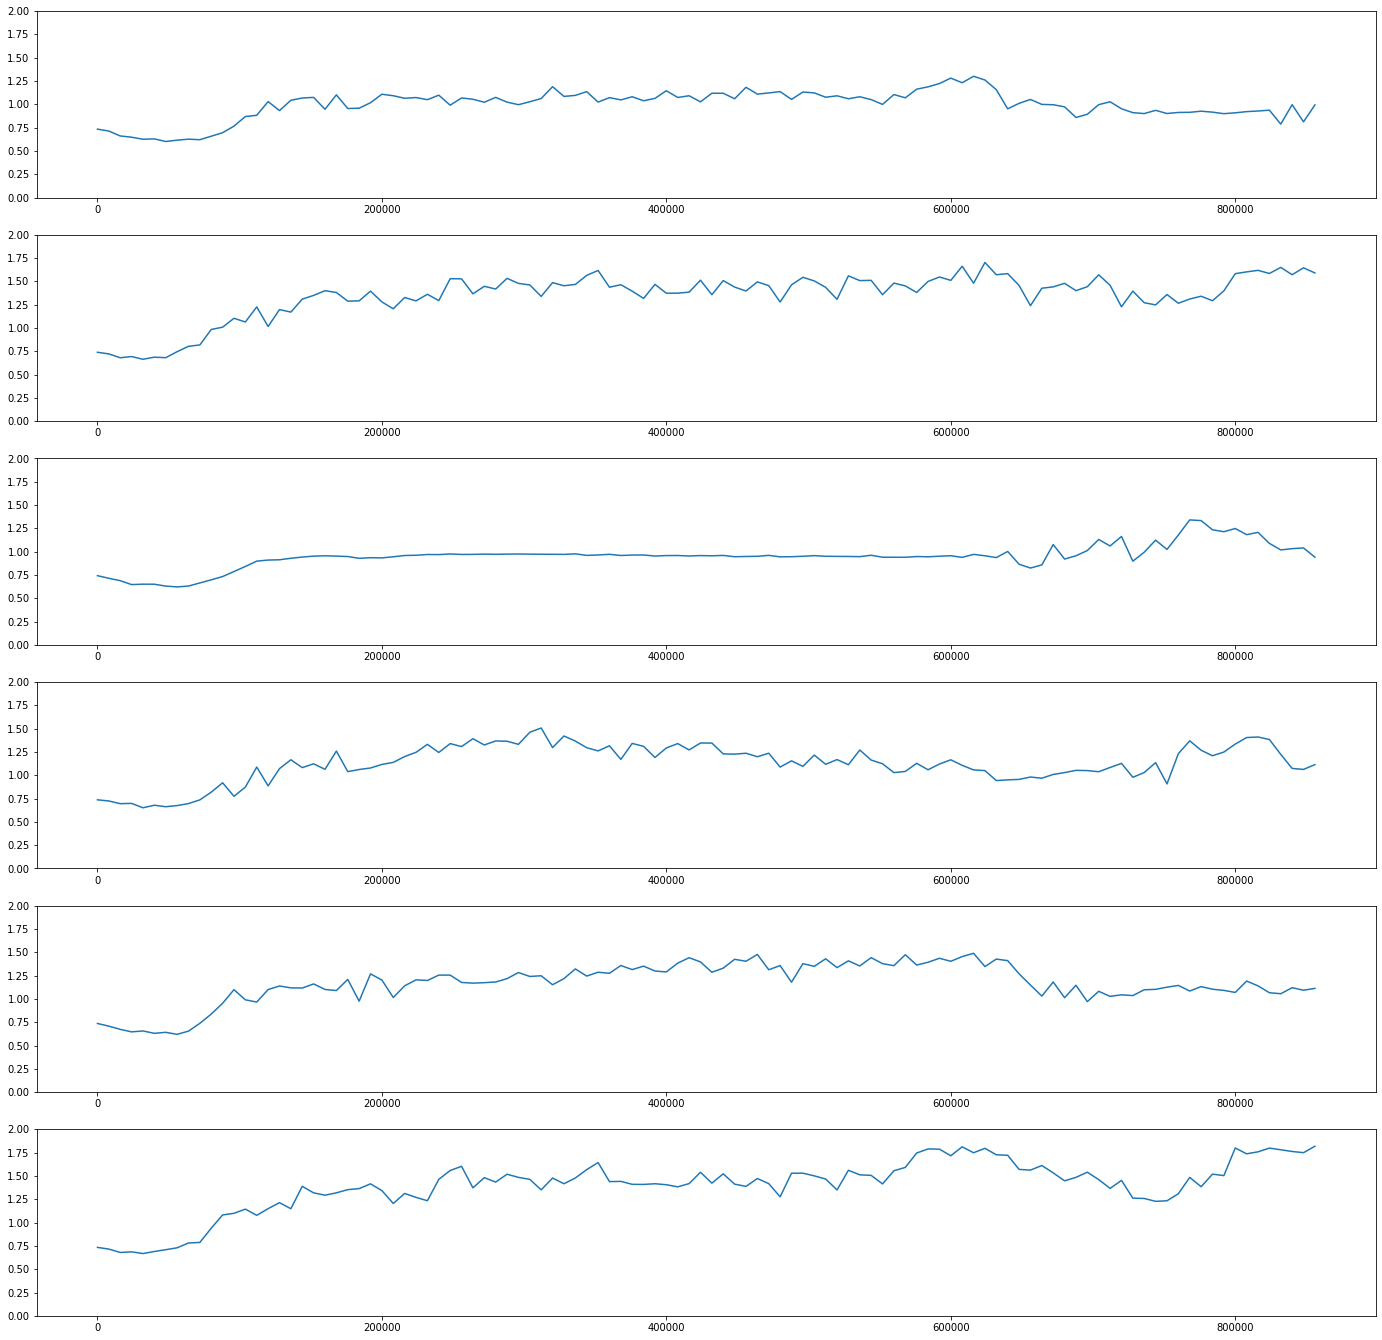

In [17]:
stuff_to_plot = [[] for j in range(6)]

for re in calculate_rewards_per_agent(reward, nplayers, recording):
    for player in range(nplayers):
        stuff_to_plot[player].append(re[player])

figure, boxes = p.subplots(6, 1, figsize=(24, 24))

for j in range(nplayers):
    boxes[j].set_ylim([0, 2])
    plotscale(boxes[j], stuff_to_plot[j])

p.show()


In [18]:
4

4